In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [61]:
gm = pd.read_csv('gapminder.csv', na_values=' ', index_col=0)

In [62]:
gm

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
country,,,,,,,,,,,,,,,
Afghanistan,NaN,0.03,0.569653,26.8,7.594400e+07,25.600000,NaN,3.654122,48.673,NaN,0.0,NaN,6.684385,55.700001,24.04
Albania,1914.996551,7.29,1.024736,57.4,2.237473e+08,42.099998,NaN,44.989947,76.918,NaN,9.0,636.341383,7.699330,51.400002,46.72
Algeria,2231.993335,0.69,2.306817,23.5,2.932109e+09,31.700001,0.1,12.500073,73.131,0.420095,2.0,590.509814,4.848770,50.500000,65.22
Andorra,21943.339898,10.17,NaN,NaN,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,5.362179,NaN,88.92
Angola,1381.004268,5.57,1.461329,23.1,2.483580e+08,69.400002,2.0,9.999954,51.093,NaN,-2.0,172.999227,14.554677,75.699997,56.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,722.807559,3.91,1.085367,16.2,1.425435e+09,67.599998,0.4,27.851822,75.181,NaN,-7.0,302.725655,11.653322,71.000000,27.84
West Bank and Gaza,NaN,NaN,5.936085,NaN,1.424133e+07,11.300000,NaN,36.422772,72.832,NaN,NaN,NaN,NaN,32.000000,71.90
"Yemen, Rep.",610.357367,0.20,2.316235,35.1,2.348647e+08,20.299999,NaN,12.349750,65.493,NaN,-2.0,130.057831,6.265789,39.000000,30.64


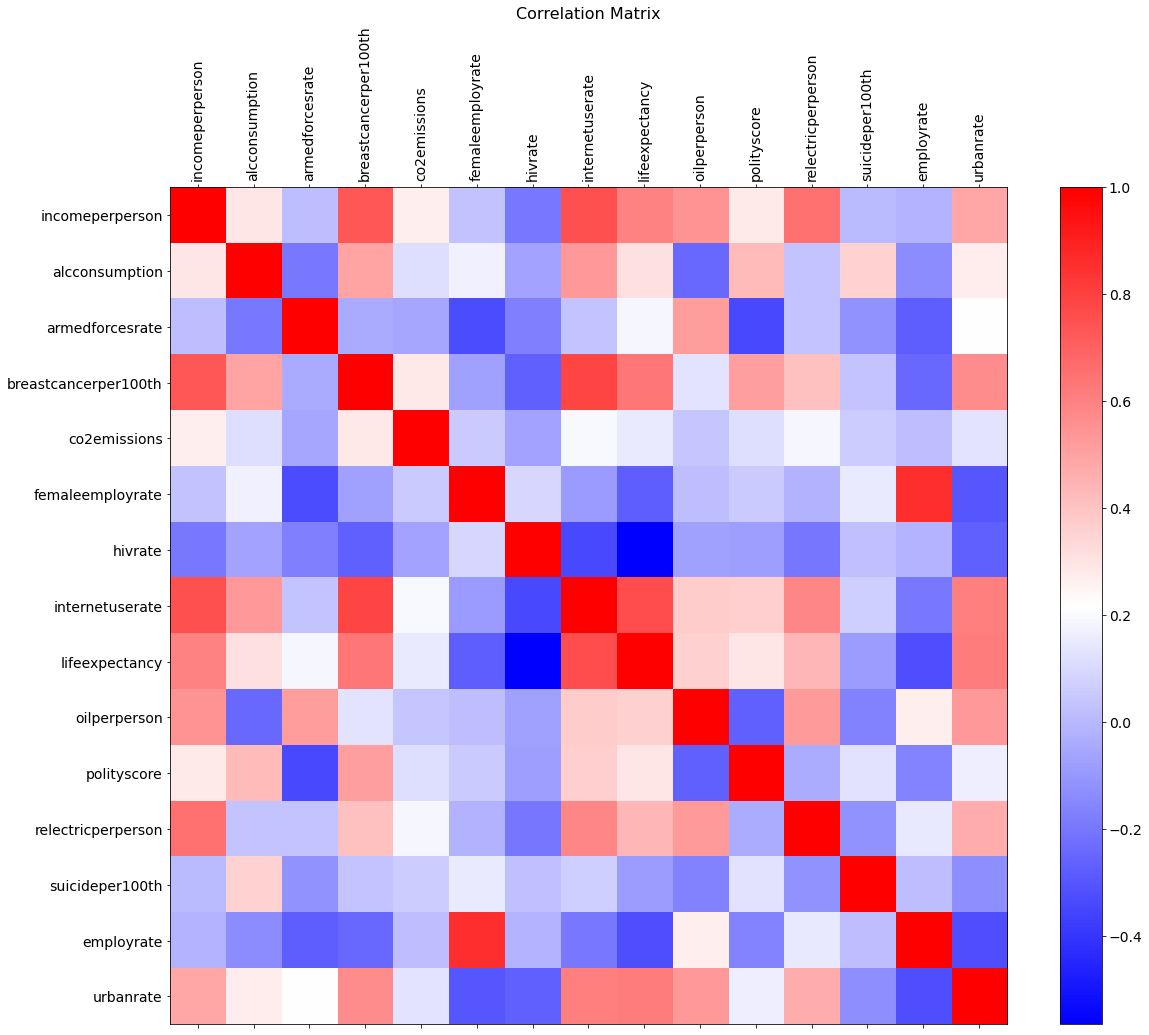

In [63]:
f = plt.figure(figsize=(19, 15))
plt.matshow(gm.corr(), fignum=f.number, cmap='bwr')
plt.xticks(range(gm.select_dtypes(['number']).shape[1]), gm.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(gm.select_dtypes(['number']).shape[1]), gm.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

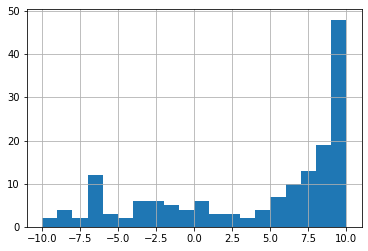

In [64]:
gm['polityscore'].hist(bins=20);

In [65]:
print(gm['armedforcesrate'].mean())

1.444016280487805


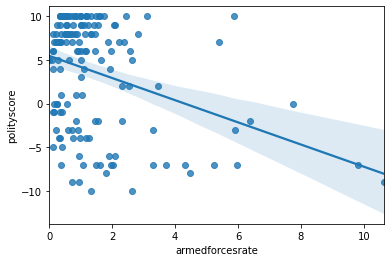

In [66]:
sns.regplot(x='armedforcesrate', y='polityscore', data=gm);

In [67]:
reg = smf.ols('polityscore ~ armedforcesrate', data=gm).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            polityscore   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     19.96
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           1.54e-05
Time:                        17:05:23   Log-Likelihood:                -489.19
No. Observations:                 153   AIC:                             982.4
Df Residuals:                     151   BIC:                             988.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.4634      0.632     